### Proper motion graphs
//milliarcseconds per year

μ^2=μRA^2 + μDec^2

- if D is in kiloparsecs
- μ in milliarcseconds/year
- VT= μD (km/s)

VR^2 + VT^2 = V^2

In [20]:
#Functions for distance, x, y, and z
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

def distance(x):
    #it shouldn't be less than 0 since I'm not getting any negative parallaxes from Gaia
    if x < 0:
        return 0
    else:
        return 1/x
def x(R, b, l):
    return R * math.cos(b) * math.cos(l)

def y(R, b, l):
    return R * math.cos(b) * math.sin(l)

def z(R, b):
    return R * math.sin(b)

In [24]:
#Functions for Proper Motion and Transverse Velocity
def pm(pmra, pmdec):
    return math.sqrt((pmra*pmra)+(pmdec*pmdec))

def vel_t(distance, pm):
    return pm*distance

def diff(pm, vel, position):
    return ((pm*vel)+position)*.0001

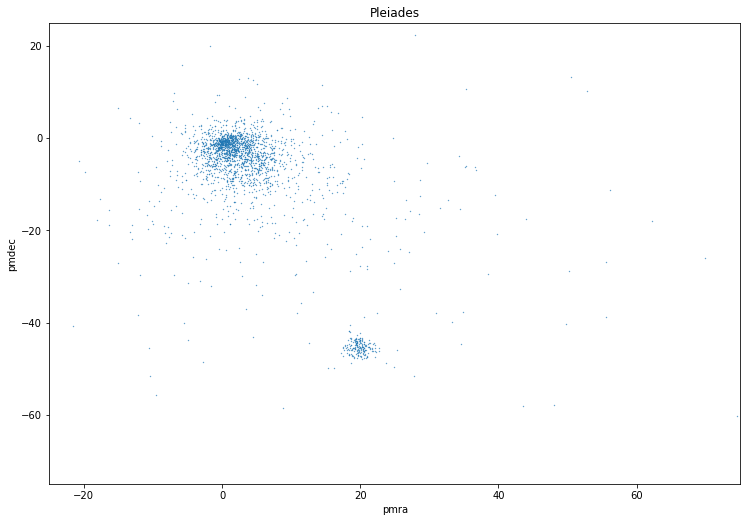

In [28]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 56.35 and 57.35 AND 
#DEC between 23.65 and 24.65 AND
#parallax > 0 AND
#phot_g_mean_mag < 18

pleiades = pd.read_csv("pleiades_final.csv")
#Pleiades total
plt.scatter(pleiades['pmra'], pleiades['pmdec'], s=0.1)
plt.xlim(-25, 75)
plt.ylim(-75, 25)
#plt.xlim(15, 25)
#plt.ylim(-50, -40)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.title("Pleiades")
plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

In [23]:
pleiades = pleiades[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
pleiades.loc[:, 'parallax_arcsec'] = pleiades['parallax'].apply(lambda x: x*.001)
pleiades.loc[:, 'R_pc'] = pleiades['parallax_arcsec'].apply(distance)
pleiades.loc[:, 'R_kpc'] = pleiades['R_pc'].apply(lambda x: x*.001)
pleiades.loc[:, 'pm'] = pleiades.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
pleiades.loc[:, 'vel_t_km/s'] = pleiades.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
pleiades.loc[:, 'dx'] = pleiades.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
pleiades.loc[:, 'dy'] = pleiades.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
pleiades.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,56.639273,23.967605,1.542492,5.941891,-12.181140,0.001542,648.301564,0.648302,13.553090,8.786489,0.010885,-0.008306
1,56.445009,23.650847,0.864438,9.922333,-3.693149,0.000864,1156.820385,1.156820,10.587353,12.247665,0.017797,-0.002158
2,56.419761,23.855061,0.257081,-0.369657,-6.633377,0.000257,3889.827275,3.889827,6.643669,25.842725,0.004687,-0.014757
3,56.443176,24.064752,0.062865,0.492922,-0.210806,0.000063,15907.066571,15.907067,0.536107,8.527894,0.006065,0.002227
4,57.085793,23.768973,0.138740,-0.019917,-0.119140,0.000139,7207.728052,7.207728,0.120793,0.870642,0.005707,0.002367
5,56.683899,23.940599,1.134974,-2.658902,-3.302945,0.001135,881.077160,0.881077,4.240189,3.735934,0.004675,0.001160
6,56.655822,23.950464,0.329145,7.108452,-1.362419,0.000329,3038.171268,3.038171,7.237836,21.989786,0.021297,-0.000601
7,56.397580,24.083017,7.503007,18.630585,-44.978247,0.007503,133.279903,0.133280,48.684098,6.488612,0.017728,-0.026776
8,57.056074,23.736716,1.398319,5.519207,-4.521619,0.001398,715.144182,0.715144,7.134892,5.102476,0.008522,0.000067
9,56.666838,23.782747,7.267479,18.633386,-43.556209,0.007267,137.599294,0.137599,47.374533,6.518702,0.017813,-0.026015


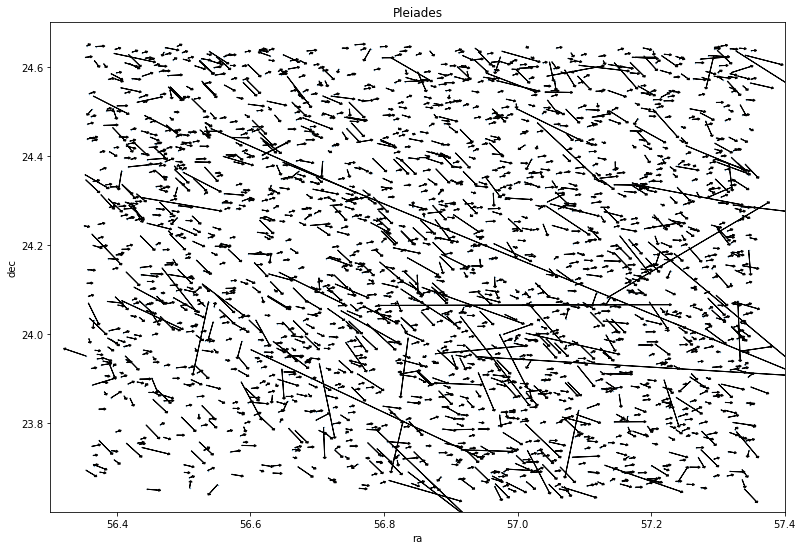

In [13]:
ax = plt.axes()
ax.scatter(pleiades['ra'], pleiades['dec'], s=0.1)

#define arrows
arrow_starts = pleiades['ra'].values
arrow_ends = pleiades['dec'].values

arrow_lengths_x = pleiades['dx'].values
arrow_lengths_y = pleiades['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.005,        #arrow head width
             head_length=0.003,      #arrow head length
             width=0.0001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-25,50)
#plt.ylim(-50,25)
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("Pleiades")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

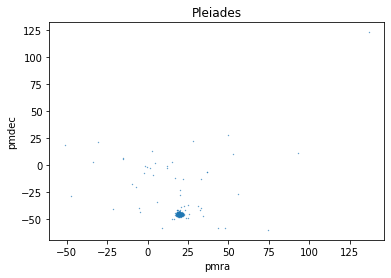

In [14]:
#pleiades6.2-12.5.csv
pleiades2 = pd.read_csv("pleiades6.2-12.5.csv")
plt.scatter(pleiades2['pmra'], pleiades2['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.title("Pleiades")
plt.show()

In [15]:
N = len(pleiades2)
print('Data loaded. Contains {} samles.'.format(N))

Data loaded. Contains 271 samles.


In [25]:
#pleiades2 = pleiades2[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
pleiades2.loc[:, 'parallax_arcsec'] = pleiades2['parallax'].apply(lambda x: x*.001)
pleiades2.loc[:, 'R_pc'] = pleiades2['parallax_arcsec'].apply(distance)
pleiades2.loc[:, 'R_kpc'] = pleiades2['R_pc'].apply(lambda x: x*.001)
pleiades2.loc[:, 'pm'] = pleiades2.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
pleiades2.loc[:, 'vel_t_km/s'] = pleiades2.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
pleiades2.loc[:, 'dx'] = pleiades2.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
pleiades2.loc[:, 'dy'] = pleiades2.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
pleiades2.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,56.426427,24.069631,7.672955,18.768578,-45.855762,0.007673,130.327882,0.130328,49.548062,6.457494,0.017762,-0.027204
1,56.397580,24.083017,7.503007,18.630585,-44.978247,0.007503,133.279903,0.133280,48.684098,6.488612,0.017728,-0.026776
2,56.666838,23.782747,7.267479,18.633386,-43.556209,0.007267,137.599294,0.137599,47.374533,6.518702,0.017813,-0.026015
3,56.517996,23.927848,7.091920,18.651298,-43.322361,0.007092,141.005532,0.141006,47.166703,6.650766,0.018056,-0.026420
4,56.559782,23.850619,7.283831,18.505357,-44.841335,0.007284,137.290389,0.137290,48.509726,6.659919,0.017980,-0.027479
5,56.657094,23.787516,7.399871,20.009694,-47.311236,0.007400,135.137488,0.135137,51.368676,6.941834,0.019556,-0.030464
6,56.732490,23.939878,7.080585,19.974366,-42.211999,0.007081,141.231268,0.141231,46.699338,6.595407,0.018847,-0.025447
7,56.412163,23.815393,7.525286,19.470645,-45.380966,0.007525,132.885323,0.132885,49.381557,6.562084,0.018418,-0.027398
8,56.373316,23.760309,7.258553,19.287093,-45.697785,0.007259,137.768505,0.137769,49.601205,6.833484,0.018817,-0.028851
9,56.414281,23.754102,7.346931,22.762672,-45.469300,0.007347,136.111255,0.136111,50.848761,6.921089,0.021396,-0.029094


In [26]:
result = pleiades2.sort_values(by=['vel_t_km/s'])
len(result) #267
#result.tail(10)

271

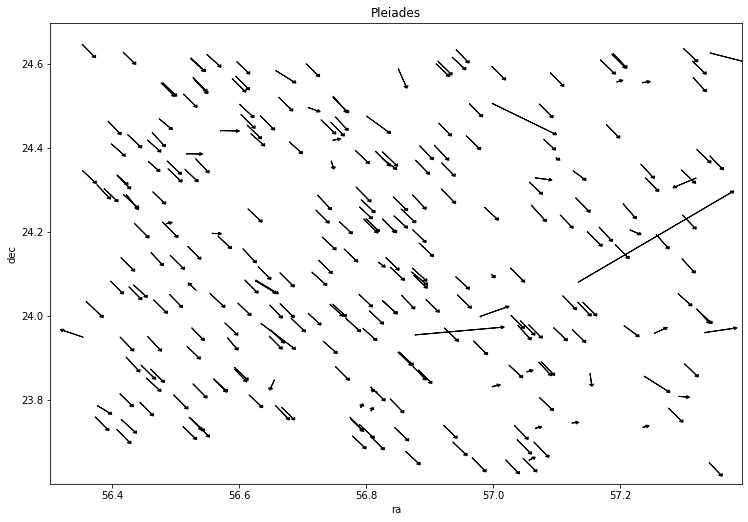

In [27]:
ax = plt.axes()
ax.scatter(pleiades2['ra'], pleiades2['dec'], s=0.1)

#define arrows
arrow_starts = pleiades2['ra'].values
arrow_ends = pleiades2['dec'].values

arrow_lengths_x = pleiades2['dx'].values
arrow_lengths_y = pleiades2['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades2['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.007,        #arrow head width
             head_length=0.005,      #arrow head length
             width=0.0001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-25,50)
#plt.ylim(-50,25)
plt.title("Pleiades")
plt.xlabel("ra")
plt.ylabel("dec")
plt.subplots_adjust(0.4, 0.4, 2, 2)
plt.show()

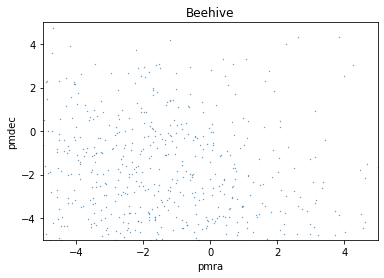

In [12]:
#RA between 129.675 and 130.675 AND
#DEC between 19.4833 and 20.4833 AND
#parallax > 0 AND
#phot_g_mean_mag < 18

beehive = pd.read_csv("beehive_final.csv")
plt.scatter(beehive['pmra'], beehive['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Beehive")
plt.show()

In [15]:
beehive = beehive[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
beehive.loc[:, 'parallax_arcsec'] = beehive['parallax'].apply(lambda x: x*.001)
beehive.loc[:, 'R_pc'] = beehive['parallax_arcsec'].apply(distance)
beehive.loc[:, 'R_kpc'] = beehive['R_pc'].apply(lambda x: x*.001)
beehive.loc[:, 'pm'] = beehive.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
beehive.loc[:, 'vel_t_km/s'] = beehive.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
beehive.loc[:, 'dx'] = beehive.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
beehive.loc[:, 'dy'] = beehive.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
beehive.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,130.548159,19.489769,1.611268,-0.144781,-3.970485,0.001611,620.629302,0.620629,3.973124,2.465837,0.013019,0.000970
1,130.334136,19.775602,2.167628,0.273622,6.695403,0.002168,461.333822,0.461334,6.700991,3.091394,0.013118,0.004047
2,130.473133,19.608428,5.628475,-36.325855,-14.024480,0.005628,177.668019,0.177668,38.939103,6.918233,-0.012084,-0.007742
3,129.853427,19.850693,0.379530,-1.579488,-0.774980,0.000380,2634.835821,2.634836,1.759368,4.635646,0.012253,0.001626
4,130.434871,19.512185,0.867475,1.611331,-10.491270,0.000867,1152.770702,1.152771,10.614290,12.235842,0.015015,-0.010886
5,130.484706,19.621293,3.014735,13.706074,-12.900904,0.003015,331.704084,0.331704,18.822587,6.243529,0.021606,-0.006093
6,130.490125,19.517374,3.045275,-16.226497,-47.913961,0.003045,328.377516,0.328378,50.587023,16.611641,-0.013906,-0.077641
7,130.389623,19.550002,5.393821,-36.508096,-13.689875,0.005394,185.397330,0.185397,38.990431,7.228722,-0.013352,-0.007941
8,130.326680,19.840508,0.916670,-10.298753,0.254839,0.000917,1090.904901,1.090905,10.301905,11.238399,0.001459,0.002270
9,130.525434,19.503462,0.780581,-2.373130,-13.397983,0.000781,1281.096801,1.281097,13.606531,17.431283,0.008916,-0.021404


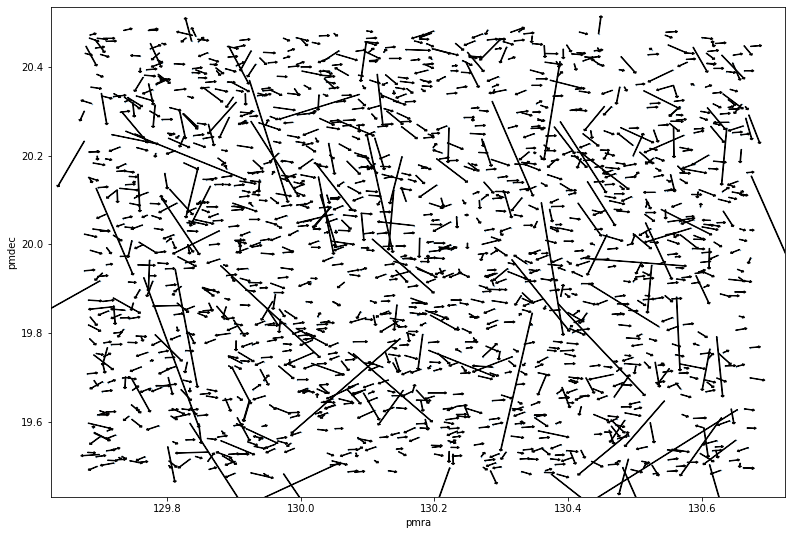

In [16]:
ax = plt.axes()
ax.scatter(beehive['ra'], beehive['dec'], s=0.1)

#define arrows
arrow_starts = beehive['ra'].values
arrow_ends = beehive['dec'].values

arrow_lengths_x = beehive['dx'].values
arrow_lengths_y = beehive['dy'].values

#add arrows to plot
for i, pm in enumerate(beehive['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.005,        #arrow head width
             head_length=0.003,      #arrow head length
             width=0.001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

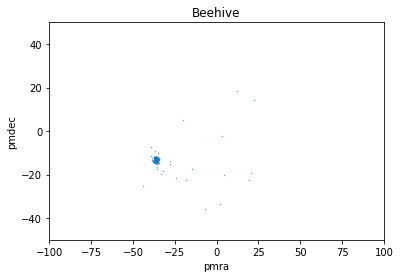

In [17]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 129.675 and 130.675 AND
#DEC between 19.4833 and 20.4833 AND
#parallax > 4.55 AND parallax < 7.14 AND
#phot_g_mean_mag < 18

beehive2 = pd.read_csv("beehive4.55-7.14.csv")
plt.scatter(beehive2['pmra'], beehive2['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-50, 50)
plt.title("Beehive")
plt.show()

In [20]:
beehive2 = beehive2[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
beehive2.loc[:, 'parallax_arcsec'] = beehive2['parallax'].apply(lambda x: x*.001)
beehive2.loc[:, 'R_pc'] = beehive2['parallax_arcsec'].apply(distance)
beehive2.loc[:, 'R_kpc'] = beehive2['R_pc'].apply(lambda x: x*.001)
beehive2.loc[:, 'pm'] = beehive2.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
beehive2.loc[:, 'vel_t_km/s'] = beehive2.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
beehive2.loc[:, 'dx'] = beehive2.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
beehive2.loc[:, 'dy'] = beehive2.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
beehive2.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,130.473133,19.608428,5.628475,-36.325855,-14.024480,0.005628,177.668019,0.177668,38.939103,6.918233,-0.012084,-0.007742
1,130.389623,19.550002,5.393821,-36.508096,-13.689875,0.005394,185.397330,0.185397,38.990431,7.228722,-0.013352,-0.007941
2,129.812712,19.725395,5.967991,-37.278894,-11.494534,0.005968,167.560564,0.167561,39.010771,6.536667,-0.011387,-0.005541
3,130.493750,19.494046,5.561987,4.587920,-20.297883,0.005562,179.791876,0.179792,20.809927,3.741456,0.014766,-0.005645
4,130.405699,19.520484,5.410946,-36.727226,-12.225647,0.005411,184.810560,0.184811,38.708598,7.153758,-0.013233,-0.006794
5,129.872337,19.786549,5.009546,-35.333686,-12.812339,0.005010,199.618878,0.199619,37.584910,7.502658,-0.013522,-0.007634
6,129.946901,19.659486,5.013659,-37.267772,-11.895566,0.005014,199.455116,0.199455,39.120216,7.802727,-0.016084,-0.007316
7,129.944598,19.736773,5.418368,-34.560973,-13.009959,0.005418,184.557408,0.184557,36.928579,6.815443,-0.010560,-0.006893
8,130.182390,19.797898,4.611626,-14.978773,-59.323145,0.004612,216.843257,0.216843,61.184959,13.267546,-0.006855,-0.076727
9,129.927558,19.778399,5.369995,-36.878631,-13.103435,0.005370,186.219915,0.186220,39.137366,7.288157,-0.013885,-0.007572


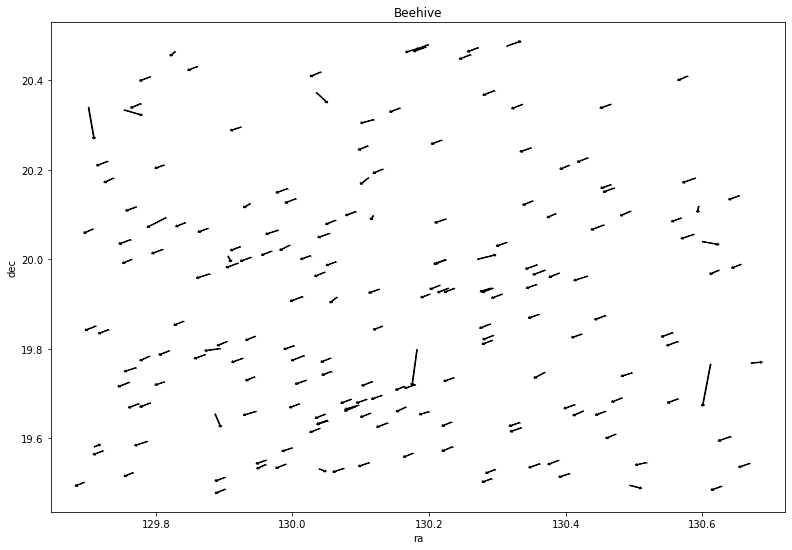

In [21]:
ax = plt.axes()
ax.scatter(beehive2['ra'], beehive2['dec'], s=0.1)

#define arrows
arrow_starts = beehive2['ra'].values
arrow_ends = beehive2['dec'].values

arrow_lengths_x = beehive2['dx'].values
arrow_lengths_y = beehive2['dy'].values

#add arrows to plot
for i, pm in enumerate(beehive2['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.005,        #arrow head width
             head_length=0.003,      #arrow head length
             width=0.001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.xlabel("ra")
plt.ylabel("dec")
plt.title("Beehive")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

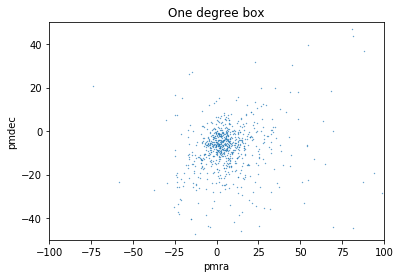

In [22]:
#SELECT * from gaiadr2.gaia_source where 
#RA between 10 and 11 AND
#DEC between 0 and 1 AND
#parallax > 0 AND
#phot_g_mean_mag < 18

one_degree_box = pd.read_csv("one_degree_box_final.csv")
plt.scatter(one_degree_box['pmra'], one_degree_box['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-100, 100)
plt.ylim(-50, 50)
plt.title("One degree box")
plt.show()

In [25]:
one_degree_box = one_degree_box[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
one_degree_box.loc[:, 'parallax_arcsec'] = one_degree_box['parallax'].apply(lambda x: x*.001)
one_degree_box.loc[:, 'R_pc'] = one_degree_box['parallax_arcsec'].apply(distance)
one_degree_box.loc[:, 'R_kpc'] = one_degree_box['R_pc'].apply(lambda x: x*.001)
one_degree_box.loc[:, 'pm'] = one_degree_box.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
one_degree_box.loc[:, 'vel_t_km/s'] = one_degree_box.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
one_degree_box.loc[:, 'dx'] = one_degree_box.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
one_degree_box.loc[:, 'dy'] = one_degree_box.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
one_degree_box.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,10.893659,0.252760,0.935714,5.427902,-0.400579,0.000936,1068.702056,1.068702,5.442663,5.816585,0.004247,-0.000208
1,10.900078,0.253864,0.595913,6.591643,0.812224,0.000596,1678.096420,1.678096,6.641496,11.145070,0.008436,0.000931
2,10.906350,0.244061,5.108074,-14.716408,27.124300,0.005108,195.768513,0.195769,30.859363,6.041292,-0.007800,0.016411
3,10.906881,0.243420,5.166752,-16.784879,26.227773,0.005167,193.545180,0.193545,31.138854,6.026775,-0.009025,0.015831
4,10.963427,0.082479,0.743634,-0.044053,-9.679604,0.000744,1344.748165,1.344748,9.679705,13.016765,0.001039,-0.012591
5,10.878118,0.215579,0.615889,8.016017,-14.578991,0.000616,1623.669175,1.623669,16.637413,27.013655,0.022742,-0.039362
6,10.632662,0.026109,0.999693,2.820828,-2.448060,0.001000,1000.307154,1.000307,3.734979,3.736126,0.002117,-0.000912
7,10.903494,0.190743,2.166783,50.917106,-23.414832,0.002167,461.513758,0.461514,56.042894,25.864567,0.132785,-0.060542
8,10.799598,0.052321,0.323872,13.188204,-8.925148,0.000324,3087.636104,3.087636,15.924416,49.168800,0.065925,-0.043879
9,10.776649,0.060394,1.246092,1.897616,-20.348493,0.001246,802.509253,0.802509,20.436783,16.400708,0.004190,-0.033367


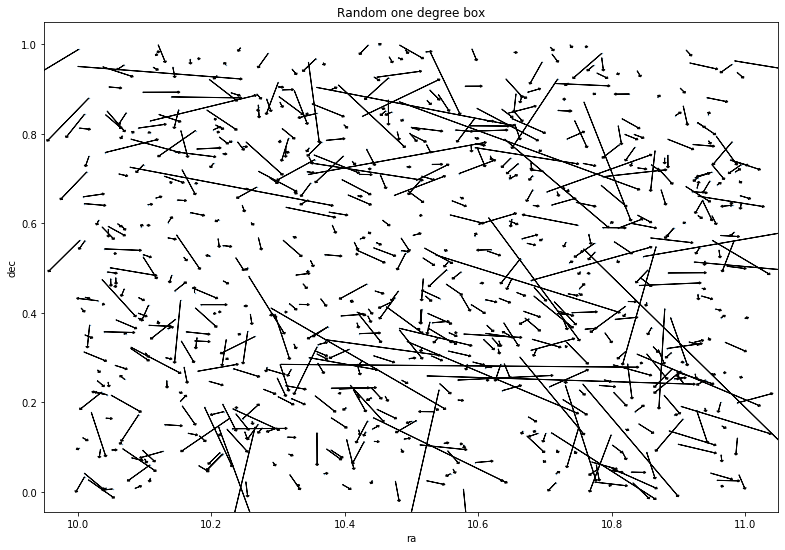

In [26]:
ax = plt.axes()
ax.scatter(one_degree_box['ra'], one_degree_box['dec'], s=0.1)

#define arrows
arrow_starts = one_degree_box['ra'].values
arrow_ends = one_degree_box['dec'].values

arrow_lengths_x = one_degree_box['dx'].values
arrow_lengths_y = one_degree_box['dy'].values

#add arrows to plot
for i, pm in enumerate(one_degree_box['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.005,        #arrow head width
             head_length=0.003,      #arrow head length
             width=0.0001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-25,50)
#plt.ylim(-50,25)
plt.title("Random one degree box")
plt.xlabel("ra")
plt.ylabel("dec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [32]:
pleiades4_trimmed = pd.read_csv("pleiades4_trimmed.csv")
pleiades4 = pleiades4_trimmed[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
pleiades4.loc[:, 'parallax_arcsec'] = pleiades4['parallax'].apply(lambda x: x*.001)
pleiades4.loc[:, 'R_pc'] = pleiades4['parallax_arcsec'].apply(distance)
pleiades4.loc[:, 'R_kpc'] = pleiades4['R_pc'].apply(lambda x: x*.001)
pleiades4.loc[:, 'pm'] = pleiades4.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
pleiades4.loc[:, 'vel_t_km/s'] = pleiades4.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
pleiades4.loc[:, 'dx'] = pleiades4.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
pleiades4.loc[:, 'dy'] = pleiades4.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
pleiades4.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,56.583196,25.475364,7.418772,19.669678,-45.716470,0.007419,134.793201,0.134793,49.768382,6.708439,0.018854,-0.028121
1,56.156051,25.137591,7.565130,22.099286,-46.678345,0.007565,132.185433,0.132185,51.645390,6.826768,0.020702,-0.029352
2,56.214727,25.087781,6.996507,19.851148,-45.767258,0.006997,142.928467,0.142928,49.886972,7.130268,0.019776,-0.030125
3,56.134121,25.136601,7.575432,21.742460,-48.117330,0.007575,132.005673,0.132006,52.801629,6.970115,0.020768,-0.031025
4,55.930096,25.080502,8.027063,22.661954,-52.811085,0.008027,124.578559,0.124579,57.468033,7.159285,0.021817,-0.035301
5,56.262096,25.088658,7.318683,20.732847,-45.817283,0.007319,136.636606,0.136637,50.289903,6.871442,0.019873,-0.028974
6,56.254816,24.777914,7.417321,20.272063,-46.835697,0.007417,134.819574,0.134820,51.034684,6.880474,0.019574,-0.029747
7,56.325700,25.099348,7.433264,20.827289,-46.309124,0.007433,134.530396,0.134530,50.777071,6.831059,0.019860,-0.029124
8,55.951939,25.043411,7.222891,18.905841,-45.755721,0.007223,138.448711,0.138449,49.507745,6.854283,0.018554,-0.028858
9,56.102938,24.864664,7.013174,19.123806,-47.173998,0.007013,142.588800,0.142589,50.902908,7.258185,0.019491,-0.031753


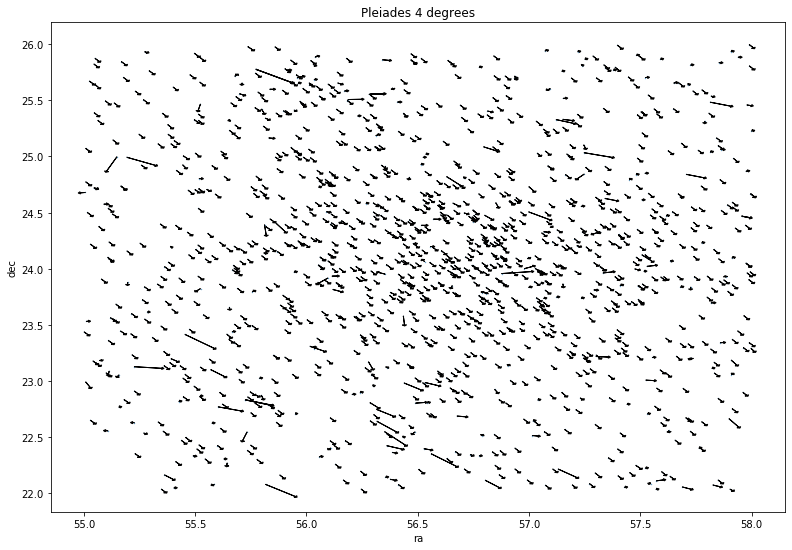

In [38]:
ax = plt.axes()
ax.scatter(pleiades4['ra'], pleiades4['dec'], s=0.1)

#define arrows
arrow_starts = pleiades4['ra'].values
arrow_ends = pleiades4['dec'].values

arrow_lengths_x = pleiades4['dx'].values
arrow_lengths_y = pleiades4['dy'].values

#add arrows to plot
for i, pm in enumerate(pleiades4['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.02,        #arrow head width
             head_length=0.01,      #arrow head length
             width=0.0001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-25,50)
#plt.ylim(-50,25)
plt.title("Pleiades 4 degrees")
plt.xlabel("ra")
plt.ylabel("dec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [41]:
beehive3_degrees = pd.read_csv("beehive3.csv")
beehive3 = beehive3_degrees[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
beehive3.loc[:, 'parallax_arcsec'] = beehive3['parallax'].apply(lambda x: x*.001)
beehive3.loc[:, 'R_pc'] = beehive3['parallax_arcsec'].apply(distance)
beehive3.loc[:, 'R_kpc'] = beehive3['R_pc'].apply(lambda x: x*.001)
beehive3.loc[:, 'pm'] = beehive3.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
beehive3.loc[:, 'vel_t_km/s'] = beehive3.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
beehive3.loc[:, 'dx'] = beehive3.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
beehive3.loc[:, 'dy'] = beehive3.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
beehive3.head(10)

,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,130.230299,18.583010,5.313191,-34.765264,-12.035515,0.005313,188.210821,0.188211,36.789634,6.924207,-0.011049,-0.006475
1,130.184818,18.656469,5.309375,-34.854537,-12.257449,0.005309,188.346080,0.188346,36.947041,6.958830,-0.011236,-0.006664
2,130.121572,18.796278,5.498319,-60.707595,-52.767533,0.005498,181.873761,0.181874,80.435220,14.629056,-0.075797,-0.075314
3,130.279972,18.626705,5.947697,-7.449854,-2.514819,0.005948,168.132299,0.168132,7.862864,1.322001,0.012043,0.001530
4,129.918981,18.616257,5.284283,-35.095136,-11.546484,0.005284,189.240429,0.189240,36.945769,6.991633,-0.011545,-0.006211
5,130.381242,18.500563,5.370153,-36.594408,-13.030609,0.005370,186.214432,0.186214,38.845173,7.233532,-0.013433,-0.007576
6,130.052862,18.586204,6.388429,-9.798298,5.585168,0.006388,156.532996,0.156533,11.278331,1.765431,0.011275,0.002845
7,130.288671,18.636037,5.823553,0.114235,-55.203230,0.005824,171.716471,0.171716,55.203349,9.479324,0.013137,-0.050465
8,129.975940,18.558249,6.739515,-37.194375,-16.473611,0.006740,148.378637,0.148379,40.679250,6.035932,-0.009453,-0.008088
9,130.079876,18.633995,5.105933,-36.821377,-12.612440,0.005106,195.850578,0.195851,38.921555,7.622809,-0.015060,-0.007751


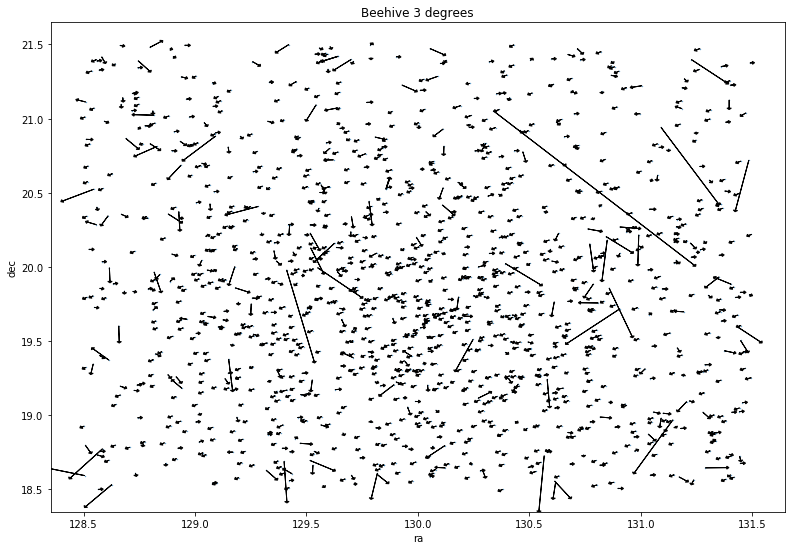

In [42]:
ax = plt.axes()
ax.scatter(beehive3['ra'], beehive3['dec'], s=0.1)

#define arrows
arrow_starts = beehive3['ra'].values
arrow_ends = beehive3['dec'].values

arrow_lengths_x = beehive3['dx'].values
arrow_lengths_y = beehive3['dy'].values

#add arrows to plot
for i, pm in enumerate(beehive3['pm']):
    ax.arrow(arrow_starts[i],        #x start point
             arrow_ends[i],          #y start point
             arrow_lengths_x[i],     #change in x 
             arrow_lengths_y[i],     #change in y
             head_width=0.02,        #arrow head width
             head_length=0.01,      #arrow head length
             width=0.0001,            #arrow stem width
             fc='black',             #arrow fill color
             ec='black')             #arrow edge color

#plt.xlim(-25,50)
#plt.ylim(-50,25)
plt.title("Beehive 3 degrees")
plt.xlabel("ra")
plt.ylabel("dec")
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

In [3]:
m35 = pd.read_csv("m351100-5000.csv")
m35 = m35[['ra', 'dec', 'parallax', 'pmra', 'pmdec']]
m35.loc[:, 'parallax_arcsec'] = m35['parallax'].apply(lambda x: x*.001)
m35.loc[:, 'R_pc'] = m35['parallax_arcsec'].apply(distance)
m35.loc[:, 'R_kpc'] = m35['R_pc'].apply(lambda x: x*.001)
m35.loc[:, 'pm'] = m35.apply(lambda x: pm(x['pmra'], x['pmdec']), axis=1)
m35.loc[:, 'vel_t_km/s'] = m35.apply(lambda x: vel_t(x['R_kpc'], x['pm']), axis=1)
m35.loc[:, 'dx'] = m35.apply(lambda x: diff(x['pmra'], x['vel_t_km/s'], x['ra']), axis=1)
m35.loc[:, 'dy'] = m35.apply(lambda x: diff(x['pmdec'], x['vel_t_km/s'], x['dec']), axis=1)
m35.head(10)

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ra,dec,parallax,pmra,pmdec,parallax_arcsec,R_pc,R_kpc,pm,vel_t_km/s,dx,dy
0,92.633688,23.399572,0.250418,1.475428,-0.007330,0.000250,3993.325873,3.993326,1.475446,5.891938,0.010133,0.002336
1,91.635633,23.272855,0.330702,0.137680,0.769463,0.000331,3023.874038,3.023874,0.781683,2.363711,0.009196,0.002509
2,91.834144,23.384090,0.597809,-1.505061,-1.047326,0.000598,1672.774077,1.672774,1.833603,3.067204,0.008722,0.002017
3,91.883018,23.346500,0.264252,0.180202,-1.029668,0.000264,3784.262724,3.784263,1.045318,3.955758,0.009260,0.001927
4,91.659630,23.475059,0.864564,-3.930692,-7.067917,0.000865,1156.652733,1.156653,8.087385,9.354296,0.005489,-0.004264
5,92.417293,23.311552,0.494338,-1.136691,-1.365943,0.000494,2022.909216,2.022909,1.777039,3.594788,0.008833,0.001840
6,91.825293,23.125768,0.252649,0.072430,-3.617740,0.000253,3958.056748,3.958057,3.618465,14.322089,0.009286,-0.002869
7,92.342905,23.350135,0.729401,0.428910,-3.108945,0.000729,1370.987717,1.370988,3.138392,4.302697,0.009419,0.000997
8,92.075534,23.298051,0.280559,0.875008,-3.545291,0.000281,3564.307045,3.564307,3.651675,13.015690,0.010346,-0.002285
9,92.598080,23.431837,0.310708,0.829809,-2.699684,0.000311,3218.451564,3.218452,2.824337,9.089992,0.010014,-0.000111


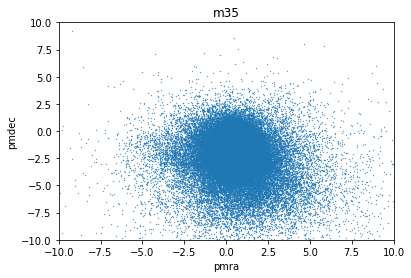

In [7]:
plt.scatter(m35['pmra'], m35['pmdec'], s=0.1)
plt.xlabel("pmra")
plt.ylabel("pmdec")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title("m35")
plt.show()

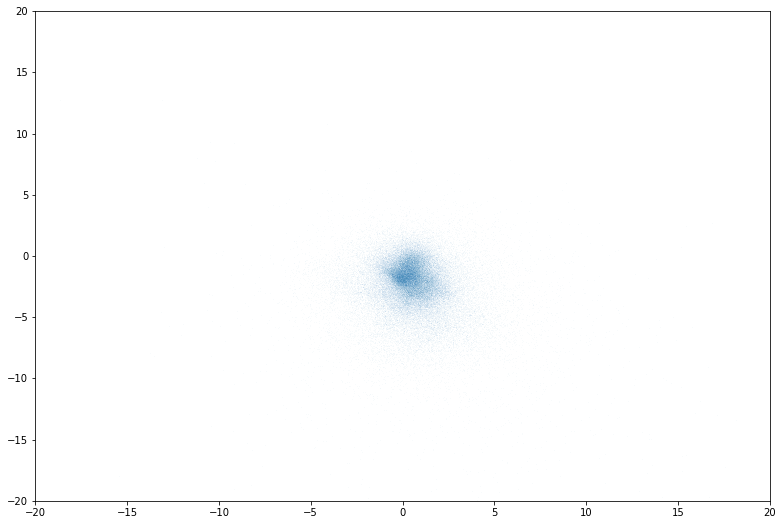

In [7]:
m35 = pd.read_csv("m351100-5000.csv")
plt.scatter(m35['pmra'], m35['pmdec'], s=0.0001)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()

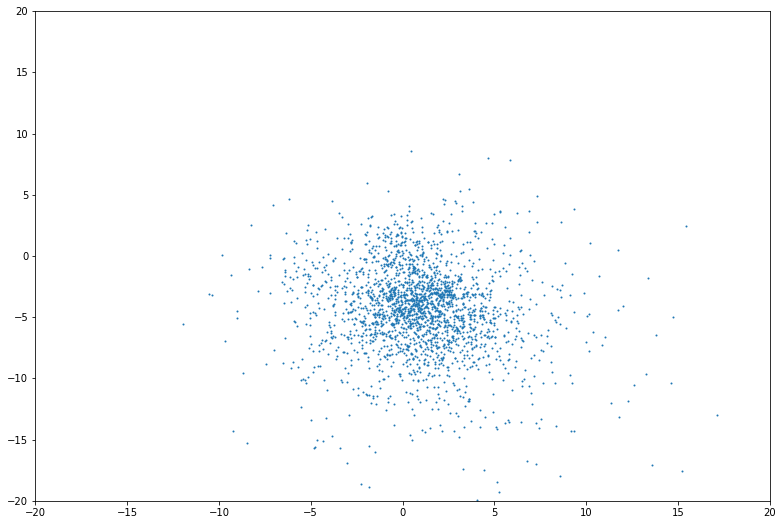

In [10]:
m35 = pd.read_csv("m35_1100_1200.csv")
plt.scatter(m35['pmra'], m35['pmdec'], s=1)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.subplots_adjust(0.3, 0.3, 2, 2)
plt.show()